In [56]:
#imorting the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import LeakyReLU
from keras.preprocessing import image

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

from IPython.display import display
from PIL import Image

import numpy as np

import matplotlib.pyplot as plt
from matplotlib import pyplot

from sklearn.metrics import classification_report, confusion_matrix

In [61]:
#Initialize the CNN
classifier = Sequential()

#Step 1 - Convolution
classifier.add(Convolution2D(64, 3, 3, 
                             input_shape = (128, 128, 3)))
               
classifier.add(LeakyReLU(alpha=0.1))

#step 2 - pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

#2nd layer
classifier.add(Convolution2D(32, 3, 3))
classifier.add(LeakyReLU(alpha=0.1))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

#3rd layer
#classifier.add(Convolution2D(32, 3, 3))
#classifier.add(LeakyReLU(alpha=0.1))
#classifier.add(MaxPooling2D(pool_size=(2, 2)))

#step 3 - Flattening
classifier.add(Flatten())

#step 4 - Full Connection
classifier.add(Dense(output_dim = 128))

classifier.add(LeakyReLU(alpha=0.1))

classifier.add(Dense(output_dim = 26, 
                     activation = 'softmax'))

classifier.compile(optimizer = 'adam', 
                   loss = 'categorical_crossentropy', 
                   metrics = ['accuracy'])

#Fitting the CNN to the images
train_datagen = ImageDataGenerator(
        shear_range = 0.2,
        zoom_range = 0.2,
        rescale = 1./255,
        horizontal_flip = False)

test_datagen = ImageDataGenerator(
        rescale = 1./255)

C:\Users\ASUS\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(128, 128,...)`
  
C:\Users\ASUS\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
C:\Users\ASUS\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=128)`
C:\Users\ASUS\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:32: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=26)`


In [62]:
training_set = train_datagen.flow_from_directory(
        'C:/Users/ASUS/Desktop/Research/Image Dataset/New Image Dataset/train_set',
        target_size = (128, 128),
        batch_size = 32,
        class_mode = 'categorical')

test_set = train_datagen.flow_from_directory(
        'C:/Users/ASUS/Desktop/Research/Image Dataset/New Image Dataset/test_set',
        target_size = (128, 128),
        batch_size = 32,
        class_mode = 'categorical')

Found 207 images belonging to 26 classes.
Found 97 images belonging to 26 classes.


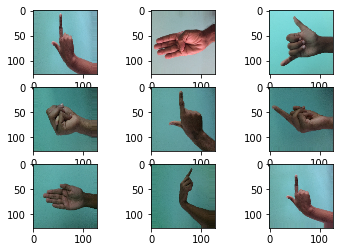

In [63]:
# generate samples and plot
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    batch = training_set.next()
    image = batch[0]
    plt.imshow(image[1])

#show the figure
pyplot.show()

In [64]:
#Training the network

history = classifier.fit_generator(
        training_set,
        steps_per_epoch = 200,
        epochs = 12,
        validation_data = test_set,
        validation_steps = 20)

Epoch 1/12
200/200 [==============================] - 764s 4s/step - loss: 0.8478 - acc: 0.7495 - val_loss: 1.0391 - val_acc: 0.7691
Epoch 2/12
200/200 [==============================] - 742s 4s/step - loss: 0.0333 - acc: 0.9901 - val_loss: 1.2114 - val_acc: 0.7526
Epoch 3/12
200/200 [==============================] - 741s 4s/step - loss: 0.0331 - acc: 0.9905 - val_loss: 1.1068 - val_acc: 0.7753
Epoch 4/12
200/200 [==============================] - 687s 3s/step - loss: 4.4574e-04 - acc: 1.0000 - val_loss: 1.0780 - val_acc: 0.7959
Epoch 5/12
200/200 [==============================] - 700s 4s/step - loss: 2.4250e-04 - acc: 1.0000 - val_loss: 1.1618 - val_acc: 0.7814
Epoch 6/12
200/200 [==============================] - 689s 3s/step - loss: 1.5610e-04 - acc: 1.0000 - val_loss: 1.1864 - val_acc: 0.7856
Epoch 7/12
200/200 [==============================] - 457s 2s/step - loss: 1.1735e-04 - acc: 1.0000 - val_loss: 1.2080 - val_acc: 0.7711
Epoch 8/12
200/200 [==============================] -

KeyboardInterrupt: 

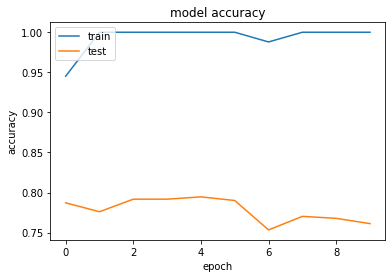

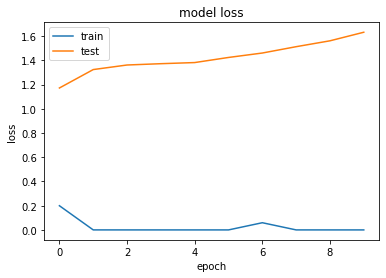

In [7]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [8]:
# save model and architecture to single file
classifier.save("model.hNew26_3")
print("Saved model to disk")

Saved model to disk


In [9]:
# load and evaluate a saved model
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from numpy import loadtxt
from keras.models import load_model
from keras.preprocessing import image

from IPython.display import display
from PIL import Image

import numpy as np
from scipy.misc import imresize
import matplotlib.pyplot as plt

# load model
classifier = load_model('model.hNew26_3')

[25]


{'1': 0,
 '10': 1,
 '11': 2,
 '12': 3,
 '13': 4,
 '14': 5,
 '15': 6,
 '16': 7,
 '17': 8,
 '18': 9,
 '19': 10,
 '2': 11,
 '20': 12,
 '21': 13,
 '22': 14,
 '23': 15,
 '24': 16,
 '25': 17,
 '26': 18,
 '3': 19,
 '4': 20,
 '5': 21,
 '6': 22,
 '7': 23,
 '8': 24,
 '9': 25}

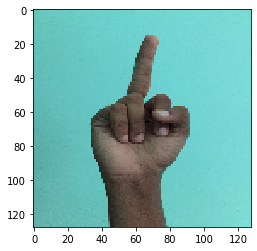

In [34]:
test_image = load_img('C:/Users/ASUS/Desktop/Research/Image Dataset/New Image Dataset/15/IMG_5543.jpg', target_size = (128, 128))

#test_image = test_image.rotate(-90)
#plt.imshow(test_image)

display_image = test_image.rotate(-90)
plt.imshow(display_image)

test_image = image.img_to_array(test_image)

test_image = np.expand_dims(test_image, axis = 0)

result = classifier.predict_classes(test_image)

print(result)

#training_set.class_indices

Sign 9


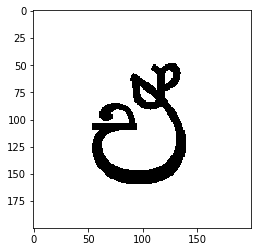

In [35]:
if result == 0:
    prediction = 'Sign 1'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter a.png')
elif result == 1:
    prediction = 'Sign 10'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter K.png')
elif result == 2:
    prediction = 'Sign 11'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter G.png')
elif result == 3:
    prediction = 'Sign 12'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter T.png')
elif result == 4:
    prediction = 'Sign 13'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter dh.png')
elif result == 5:
    prediction = 'Sign 14'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter th.png')
elif result == 6:
    prediction = 'Sign 15'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter D.png')
elif result == 7:
    prediction = 'Sign 16'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter N.png')
elif result == 8:
    prediction = 'Sign 17'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter P.png')
elif result == 9:
    prediction = 'Sign 18'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter B.png')
elif result == 10:
    prediction = 'Sign 19'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter M.png')
elif result == 11:
    prediction = 'Sign 2'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter aa.png')
elif result == 12:
    prediction = 'Sign 20'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter Y.png')
elif result == 13:
    prediction = 'Sign 21'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter R.png')
elif result == 14:
    prediction = 'Sign 22'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter L.png')
elif result == 15:
    prediction = 'Sign 23'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter V.png')
elif result == 16:
    prediction = 'Sign 24'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter S.png')
elif result == 17:
    prediction = 'Sign 25'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter H.png')
elif result == 18:
    prediction = 'Sign 26'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter ch.png')
elif result == 19:
    prediction = 'Sign 3'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter ae.png')
elif result == 20:
    prediction = 'Sign 4'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter i.png')
elif result == 21:
    prediction = 'Sign 5'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter ii.png')
elif result == 22:
    prediction = 'Sign 6'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter u.png')
elif result == 23:
    prediction = 'Sign 7'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter uu.png')
elif result == 24:
    prediction = 'Sign 8'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter e.png')
elif result == 25:
    prediction = 'Sign 9'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter ee.png')
    
print(prediction)
plt.imshow(Result_Image)